code from: https://machinelearningmastery.com/arima-for-time-zill-forecasting-with-python/



In [2]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [3]:
zill = pd.read_csv('https://mod4finalproject.s3.amazonaws.com/zillow_cleaned_no_nulls.csv', 
                   index_col=0, 
                   dtype = {'zip':'object'})

In [3]:
zill = zill.drop(columns = ['regionid', 'city', 'state', 'metro', 'countyname', 'sizerank'])

In [28]:
zill.index = pd.to_datetime(zill.index)

In [4]:
best_zips = ['90210', '33480', '01001']

In [39]:
# zill = zill.resample('M', convention='start').sum()

# Model for all data

In [40]:
# def parser(x):
#     return datetime.strptime('190'+x, '%Y-%m')
 
model = ARIMA(np.asarray(zill.value.values), order=(10,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

# Model for zip 1

In [10]:
zip1 = zill.loc[(zill.zip == best_zips[0])]

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  264
Model:                ARIMA(16, 1, 0)   Log Likelihood               -2660.512
Method:                       css-mle   S.D. of innovations           5684.600
Date:                Wed, 06 May 2020   AIC                           5357.025
Time:                        13:02:26   BIC                           5421.392
Sample:                             1   HQIC                          5382.889
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.872e+04   8325.379      2.248      0.025    2399.603     3.5e+04
ar.L1.D.y      1.7522      0.064     27.270      0.000       1.626       1.878
ar.L2.D.y     -1.6912      0.129    -13.109      0.0

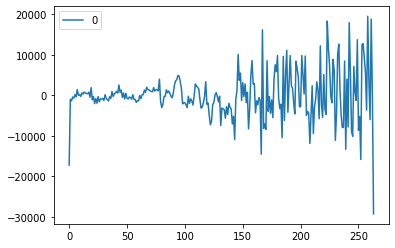

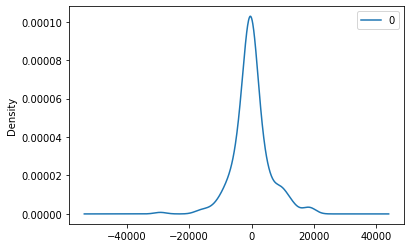

                  0
count    264.000000
mean      14.018934
std     5789.596538
min   -29256.313980
25%    -2290.267503
50%     -275.935250
75%     1770.189242
max    19548.114503


In [11]:
# def parser(x):
#     return datetime.strptime('190'+x, '%Y-%m')
 
model = ARIMA(np.asarray(zip1.value.values), order=(16,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Rolling forecast ARIMA model 

predicted=2494902.890173, expected=2481600.000000, difference=13302.890173
predicted=2490026.436782, expected=2475000.000000, difference=15026.436782
predicted=2483340.571429, expected=2474400.000000, difference=8940.571429
predicted=2482689.772727, expected=2468400.000000, difference=14289.772727
predicted=2476609.039548, expected=2457500.000000, difference=19109.039548
predicted=2465601.685393, expected=2462500.000000, difference=3101.685393
predicted=2470584.357542, expected=2483600.000000, difference=-13015.642458
predicted=2491756.666667, expected=2512200.000000, difference=-20443.333333
predicted=2520469.613260, expected=2538000.000000, difference=-17530.386740
predicted=2546365.934066, expected=2559600.000000, difference=-13234.065934
predicted=2568038.251366, expected=2575700.000000, difference=-7661.748634
predicted=2584179.891304, expected=2583700.000000, difference=479.891304
predicted=2592177.297297, expected=2590700.000000, difference=1477.297297
predicted=2599169.354839, 

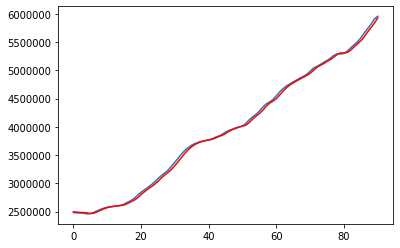

In [20]:
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# def parser(x):
#     return datetime.strptime('190'+x, '%Y-%m')

X = zip1.value.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f, difference=%f' % (yhat, obs, yhat-obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()